# <center>Convolutional Neural Networks</center>

---

This notebook explains CNNs through the implementation in sklearn. <br>
<br>We train a CNN to classify images from the [CIFAR-10 database](https://www.cs.toronto.edu/~kriz/cifar.html).
- The CIFAR-10 dataset consists of 60,000 colour images of size (32x32) in 10 classes, with 6000 images per class.
- Here are the classes in the dataset, as well as 10 random images from each:
  - airplane										
  - automobile										
  - bird										
  - cat										
  - deer										
  - dog										
  - frog										
  - horse										
  - ship										
  - truck										


### 1. Load CIFAR-10 Database

In [95]:
import keras
from keras.datasets import cifar10

# load the pre-shuffled train and test data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

### 2. Visualize Some Training Images

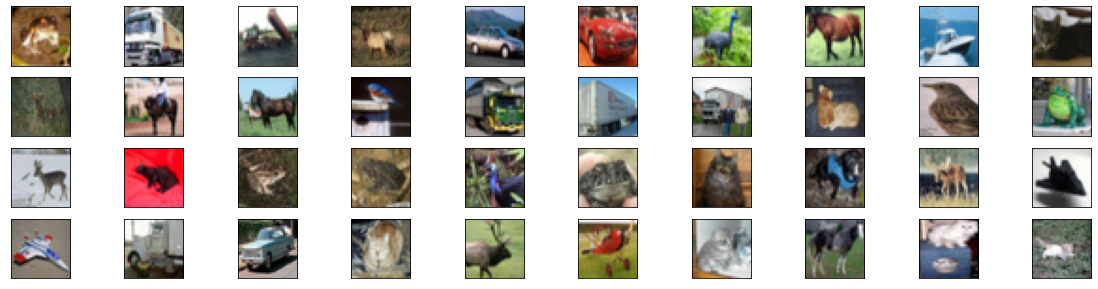

In [96]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(20,5))
for i in range(40):
    ax = fig.add_subplot(4, 10, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_train[i]))

### 3. Rescale the Images by Dividing Every Pixel in Every Image by 255

- Let's see how a datapoint looks like:

In [97]:
print(x_train[1])

[[[154 177 187]
  [126 137 136]
  [105 104  95]
  ...
  [ 91  95  71]
  [ 87  90  71]
  [ 79  81  70]]

 [[140 160 169]
  [145 153 154]
  [125 125 118]
  ...
  [ 96  99  78]
  [ 77  80  62]
  [ 71  73  61]]

 [[140 155 164]
  [139 146 149]
  [115 115 112]
  ...
  [ 79  82  64]
  [ 68  70  55]
  [ 67  69  55]]

 ...

 [[175 167 166]
  [156 154 160]
  [154 160 170]
  ...
  [ 42  34  36]
  [ 61  53  57]
  [ 93  83  91]]

 [[165 154 128]
  [156 152 130]
  [159 161 142]
  ...
  [103  93  96]
  [123 114 120]
  [131 121 131]]

 [[163 148 120]
  [158 148 122]
  [163 156 133]
  ...
  [143 133 139]
  [143 134 142]
  [143 133 144]]]


---

- Let's normalize each cell value [0,255], so that each cell value lies within the same distribution [0,1].
  - That is values change from [0,255] --> [0,1].
- We normalize using the formula: 
> $$ \frac{X-X_{min}}{X_{max}-X_{min}}$$
- Here, X_min=0 and X_max=255.
- Hence, 
> $$ \frac{X-X_{min}}{X_{max}-X_{min}} = \frac{X}{255}$$

In [98]:
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

### 4.  Break Dataset into Training, Testing, and Validation Sets

- A datapoint in the dataset could belong to any one of the 10 classes mentioned earlier.
- Let's convert the output into one-hot encoded vector of size 10.
- This will be helpful for our CNN to recognize a given image datapoint into one of the 10 classes.

In [99]:
from keras.utils import np_utils

# one-hot encoding 
num_classes = len(np.unique(y_train))
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [100]:
# break training set into training and validation sets
(x_train, x_valid) = x_train[5000:], x_train[:5000]
(y_train, y_valid) = y_train[5000:], y_train[:5000]

# print shape of training set
print('x_train shape:', x_train.shape)

# print number of training, validation, and test images
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print(x_valid.shape[0], 'validation samples')

x_train shape: (45000, 32, 32, 3)
45000 train samples
10000 test samples
5000 validation samples


### 5. Data Augmentation

- Data augmentation helps in creating invariance in the data, especially in image data.
  - Invariance in data could be for:
    - Shift
    - Rotation
    - Zoom
    - Noise, etc

In [101]:
from keras.preprocessing.image import ImageDataGenerator

# create and configure augmented image generator
datagen_train = ImageDataGenerator(
    width_shift_range=0.1,  # randomly shift images horizontally (10% of total width)
    height_shift_range=0.1,  # randomly shift images vertically (10% of total height)
    horizontal_flip=True) # randomly flip images horizontally

# fit augmented image generator on data
datagen_train.fit(x_train)

### 6. Visualize Original and Augmented Images

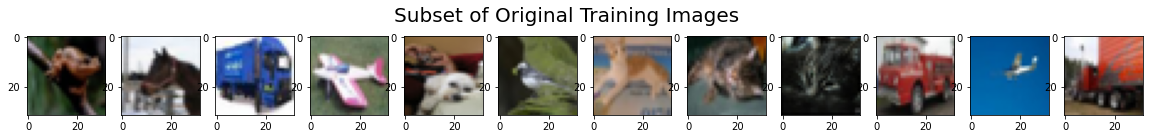

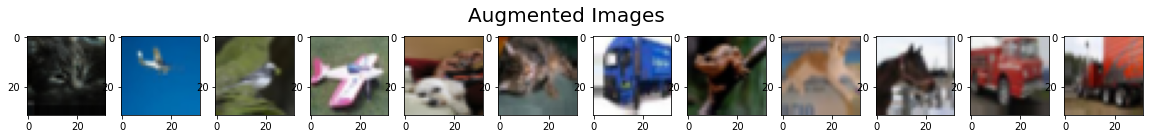

In [102]:
import matplotlib.pyplot as plt

# take subset of training data
x_train_subset = x_train[:12]

# visualize subset of training data
fig = plt.figure(figsize=(20,2))
for i in range(0, len(x_train_subset)):
    ax = fig.add_subplot(1, 12, i+1)
    ax.imshow(x_train_subset[i])
fig.suptitle('Subset of Original Training Images', fontsize=20)
plt.show()

# visualize augmented images
fig = plt.figure(figsize=(20,2))
for x_batch in datagen_train.flow(x_train_subset, batch_size=12):
    for i in range(0, 12):
        ax = fig.add_subplot(1, 12, i+1)
        ax.imshow(x_batch[i])
    fig.suptitle('Augmented Images', fontsize=20)
    plt.show()
    break;

### 7. Define the Model Architecture 

In [103]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

input_shape = x_train[1].shape

model = Sequential()
model.add(Conv2D(filters=32, kernel_size=3, padding='same', kernel_initializer='glorot_uniform',
                 activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32, kernel_size=2, padding='same', kernel_initializer='glorot_uniform',
                 activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=2, kernel_initializer='glorot_uniform', padding='same',
                 activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512, kernel_initializer='glorot_uniform', activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 16, 16, 32)        4128      
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 8, 8, 32)          0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 8, 8, 64)          8256      
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 4, 4, 64)         

### 8. Compile the Model 

In [104]:
# compile the model
model.compile(loss='categorical_crossentropy', optimizer='Adamax', 
                  metrics=['accuracy'])

### 9. Train the Model 

> Note:
- verbose=0 will show you nothing (silent)
- verbose=1 will show you an animated progress bar like this:
  - progres_bar
- verbose=2 will just mention the number of epoch like this:
  - Epoch = 1/10

In [105]:
from keras.callbacks import ModelCheckpoint   

batch_size = 35
epochs = 50

# train the model
checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose=1, 
                               save_best_only=True)
hist = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs,
          validation_data=(x_valid, y_valid), callbacks=[checkpointer], 
          verbose=2, shuffle=True)

Train on 45000 samples, validate on 5000 samples
Epoch 1/50
 - 12s - loss: 1.6698 - accuracy: 0.3874 - val_loss: 1.3551 - val_accuracy: 0.5184

Epoch 00001: val_loss improved from inf to 1.35512, saving model to model.weights.best.hdf5
Epoch 2/50
 - 11s - loss: 1.3558 - accuracy: 0.5094 - val_loss: 1.2253 - val_accuracy: 0.5532

Epoch 00002: val_loss improved from 1.35512 to 1.22526, saving model to model.weights.best.hdf5
Epoch 3/50
 - 11s - loss: 1.2383 - accuracy: 0.5564 - val_loss: 1.1120 - val_accuracy: 0.6148

Epoch 00003: val_loss improved from 1.22526 to 1.11199, saving model to model.weights.best.hdf5
Epoch 4/50
 - 13s - loss: 1.1399 - accuracy: 0.5939 - val_loss: 1.0113 - val_accuracy: 0.6498

Epoch 00004: val_loss improved from 1.11199 to 1.01130, saving model to model.weights.best.hdf5
Epoch 5/50
 - 12s - loss: 1.0773 - accuracy: 0.6150 - val_loss: 0.9489 - val_accuracy: 0.6730

Epoch 00005: val_loss improved from 1.01130 to 0.94893, saving model to model.weights.best.hdf5


### 10. Load the Model with the Best Validation Accuracy

In [106]:
# load the weights that yielded the best validation accuracy
model.load_weights('model.weights.best.hdf5')

### 11. Calculate Classification Accuracy on Test Set

In [107]:
# evaluate and print test accuracy
score = model.evaluate(x_test, y_test, verbose=0) 
print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

Test loss: 0.6550379812240601
Test accuracy: 0.7741000056266785


---

#### How to interpret loss and accuracy?

- Loss can be seen as a distance between the true values of the problem and the values predicted by the model.
  - Greater the loss is, more huge is the errors made on the data.

- Accuracy can be seen as the number of errors made on the data.

  That means :
  - a low accuracy and huge loss means:
    - the model made huge errors on a lot of data
  - a low accuracy but low loss means:
    - the model made little errors on a lot of data
  - a great accuracy with low loss means:
    - the model made low errors on a few data (best case)

---

- The function below is used to update the plots for each epoch and error.

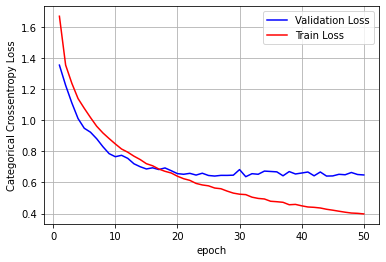

In [108]:
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4

def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

vy = hist.history['val_loss']
ty = hist.history['loss']
plt_dynamic(x, vy, ty, ax)

### 12. Visualize Some Predictions

This may give you some insight into why the network is misclassifying certain objects.

In [109]:
# get predictions on the test set
y_hat = model.predict(x_test)

cifar10_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

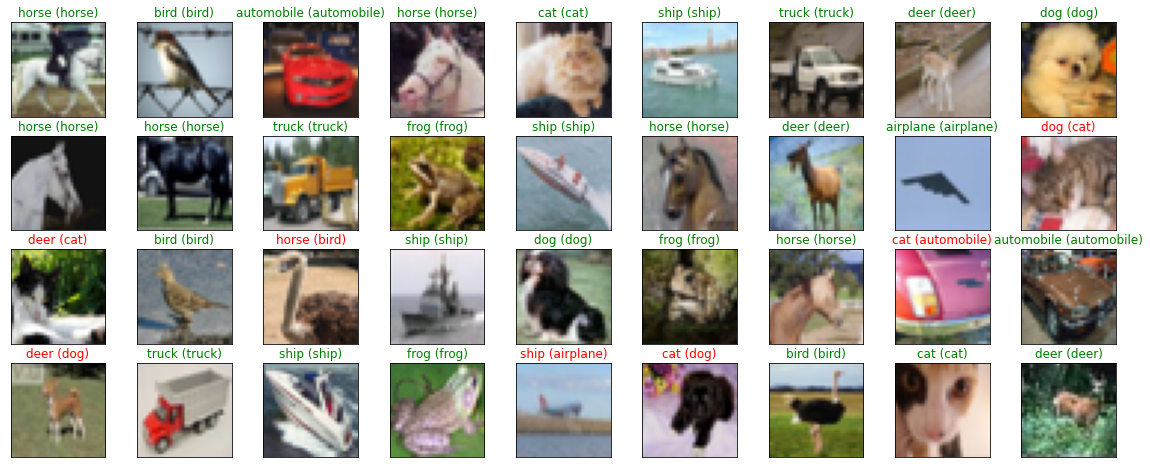

In [110]:
# plot a random sample of test images, their predicted labels, and ground truth
fig = plt.figure(figsize=(20, 8))
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=36, replace=False)):
    ax = fig.add_subplot(4, 9, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[idx]))
    pred_idx = np.argmax(y_hat[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(cifar10_labels[pred_idx], cifar10_labels[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))